In [232]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [233]:
corpus_raw = 'He is the king' # . The king is royal . She is the royal  queen '

In [234]:
corpus_raw = corpus_raw.lower()

In [235]:
words = []
for word in corpus_raw.split():
    if word != '.':
        words.append(word)

# remove dupliate use Set        
words = set(words)
print(words)

{'king', 'the', 'is', 'he'}


In [236]:
word2int = {}
int2word = {}

vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
    


In [237]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')

sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    
print(sentences)
    



[['he', 'is', 'the', 'king']]


In [238]:
data = []
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            #print('sentence[', max(word_index - WINDOW_SIZE, 0), ':', min(word_index + WINDOW_SIZE, len(sentence)) + 1,']')
            #print('inner loop -->' ,nb_word, word)
            # if not same word
            if nb_word != word: 
                #print('data.append( -->' ,nb_word, word, ')')
                data.append([word, nb_word])
                
print('data size -->', len(data), '\n data-->', data)

data size --> 10 
 data--> [['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the']]


In [239]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    print(temp)
    return temp

In [240]:
x_train = [] # input word
y_train = [] # output word

In [241]:
print(word2int)
print(int2word, '\n')
for data_word in data:
    print('x_train', data_word[0],  word2int[data_word[0]], 'y_train', data_word[1], word2int[data_word[1]])
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

{'king': 0, 'the': 1, 'is': 2, 'he': 3}
{0: 'king', 1: 'the', 2: 'is', 3: 'he'} 

x_train he 3 y_train is 2
[ 0.  0.  0.  1.]
[ 0.  0.  1.  0.]
x_train he 3 y_train the 1
[ 0.  0.  0.  1.]
[ 0.  1.  0.  0.]
x_train is 2 y_train he 3
[ 0.  0.  1.  0.]
[ 0.  0.  0.  1.]
x_train is 2 y_train the 1
[ 0.  0.  1.  0.]
[ 0.  1.  0.  0.]
x_train is 2 y_train king 0
[ 0.  0.  1.  0.]
[ 1.  0.  0.  0.]
x_train the 1 y_train he 3
[ 0.  1.  0.  0.]
[ 0.  0.  0.  1.]
x_train the 1 y_train is 2
[ 0.  1.  0.  0.]
[ 0.  0.  1.  0.]
x_train the 1 y_train king 0
[ 0.  1.  0.  0.]
[ 1.  0.  0.  0.]
x_train king 0 y_train is 2
[ 1.  0.  0.  0.]
[ 0.  0.  1.  0.]
x_train king 0 y_train the 1
[ 1.  0.  0.  0.]
[ 0.  1.  0.  0.]


In [242]:
# convert them to numpy arrays

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [243]:
x_train

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [244]:
y_train

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [245]:
# meaning 10 training points, where each point has 4 (unique dictionary words in entire corpus) dimensions
print(x_train.shape, y_train.shape)

(10, 4) (10, 4)


# Make the tensorflow model

In [246]:
g = tf.Graph()

x = tf.placeholder(tf.float32, shape =(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias

print(W1.shape)
hidden_representation = tf.add(tf.matmul(x,W1), b1)
print(hidden_representation)

(4, 5)
Tensor("Add_20:0", shape=(?, 5), dtype=float32)


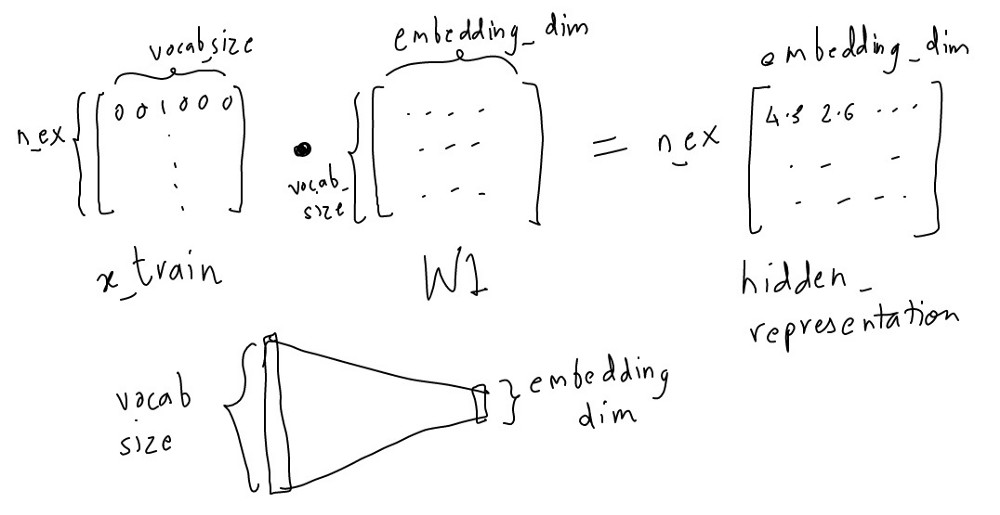


g = tf.Graph()
with g.as_default():

    x = tf.placeholder(tf.float32, shape =(None, vocab_size))
    y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


    EMBEDDING_DIM = 4
    W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]), name = 'W1')
    b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]), name = 'b1') #bias

    hidden_representation = tf.add(tf.matmul(x,W1), b1)
    print(hidden_representation)
    
    W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]), name = 'W2')
    b2 = tf.Variable(tf.random_normal([vocab_size]), name = 'b2')
    prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))
    
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    
        # define the loss function:

    cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices = [1]))
    print(cross_entropy_loss)
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
    print(train_step)

    n_iters = 10000

    # train for n_iter iterations

    for _ in range(n_iters):
        sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
        
    print(sess.run(W1))
    print('----------')
    print(sess.run(b1))
    print('----------')

tf.summary.FileWriter("/c/Users/jaags/Documents/ML-Projects/Tensorflow/logs", g).close()


In [247]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

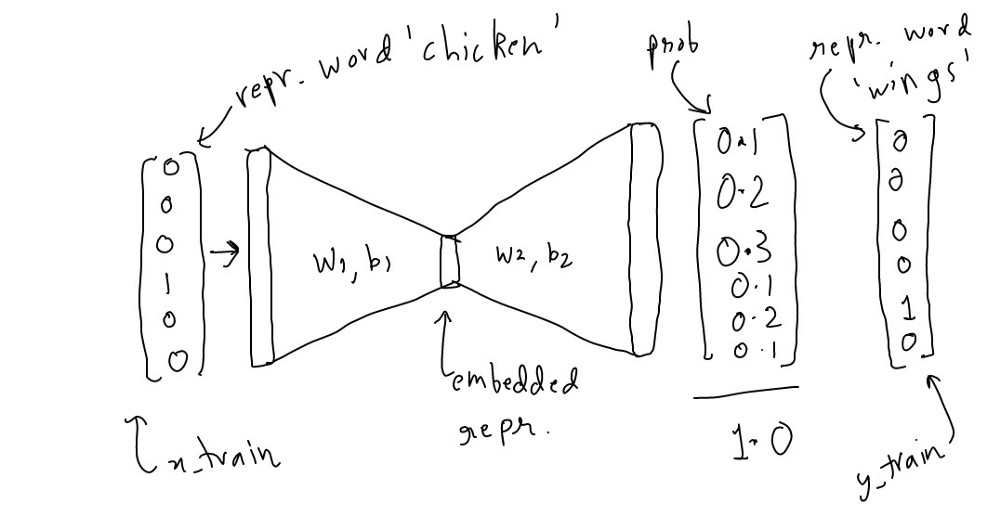

In [248]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


In [249]:
# define the loss function:

cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices = [1]))
print(cross_entropy_loss)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
print(train_step)

n_iters = 10000


Tensor("Mean_7:0", shape=(), dtype=float32)
name: "GradientDescent_7"
op: "NoOp"
input: "^GradientDescent_7/update_Variable_83/ApplyGradientDescent"
input: "^GradientDescent_7/update_Variable_84/ApplyGradientDescent"
input: "^GradientDescent_7/update_Variable_85/ApplyGradientDescent"
input: "^GradientDescent_7/update_Variable_86/ApplyGradientDescent"



In [250]:
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  2.99095
loss is :  2.79524
loss is :  2.63456
loss is :  2.499
loss is :  2.38183
loss is :  2.27862
loss is :  2.18653
loss is :  2.10367
loss is :  2.02873
loss is :  1.96074
loss is :  1.89889
loss is :  1.84252
loss is :  1.79104
loss is :  1.74396
loss is :  1.70081
loss is :  1.6612
loss is :  1.62481
loss is :  1.59132
loss is :  1.56048
loss is :  1.53206
loss is :  1.50585
loss is :  1.48167
loss is :  1.45935
loss is :  1.43875
loss is :  1.41972
loss is :  1.40213
loss is :  1.38588
loss is :  1.37086
loss is :  1.35696
loss is :  1.34409
loss is :  1.33217
loss is :  1.32112
loss is :  1.31088
loss is :  1.30136
loss is :  1.29251
loss is :  1.28427
loss is :  1.2766
loss is :  1.26943
loss is :  1.26274
loss is :  1.25647
loss is :  1.2506
loss is :  1.24508
loss is :  1.23988
loss is :  1.23499
loss is :  1.23036
loss is :  1.22599
loss is :  1.22184
loss is :  1.2179
loss is :  1.21415
loss is :  1.21057
loss is :  1.20715
loss is :  1.20387
loss is :  1.20073

loss is :  0.943299
loss is :  0.943281
loss is :  0.943264
loss is :  0.943246
loss is :  0.943228
loss is :  0.943211
loss is :  0.943193
loss is :  0.943176
loss is :  0.943159
loss is :  0.943142
loss is :  0.943124
loss is :  0.943108
loss is :  0.94309
loss is :  0.943074
loss is :  0.943057
loss is :  0.94304
loss is :  0.943024
loss is :  0.943007
loss is :  0.94299
loss is :  0.942974
loss is :  0.942958
loss is :  0.942941
loss is :  0.942925
loss is :  0.942909
loss is :  0.942893
loss is :  0.942877
loss is :  0.942861
loss is :  0.942845
loss is :  0.94283
loss is :  0.942814
loss is :  0.942798
loss is :  0.942783
loss is :  0.942767
loss is :  0.942752
loss is :  0.942737
loss is :  0.942721
loss is :  0.942706
loss is :  0.942691
loss is :  0.942676
loss is :  0.942661
loss is :  0.942646
loss is :  0.942631
loss is :  0.942616
loss is :  0.942601
loss is :  0.942587
loss is :  0.942572
loss is :  0.942558
loss is :  0.942543
loss is :  0.942529
loss is :  0.942514
loss

loss is :  0.939384
loss is :  0.93938
loss is :  0.939376
loss is :  0.939373
loss is :  0.939369
loss is :  0.939365
loss is :  0.939361
loss is :  0.939357
loss is :  0.939353
loss is :  0.93935
loss is :  0.939346
loss is :  0.939342
loss is :  0.939338
loss is :  0.939335
loss is :  0.939331
loss is :  0.939327
loss is :  0.939324
loss is :  0.93932
loss is :  0.939316
loss is :  0.939312
loss is :  0.939309
loss is :  0.939305
loss is :  0.939301
loss is :  0.939298
loss is :  0.939294
loss is :  0.93929
loss is :  0.939287
loss is :  0.939283
loss is :  0.93928
loss is :  0.939276
loss is :  0.939272
loss is :  0.939269
loss is :  0.939265
loss is :  0.939261
loss is :  0.939258
loss is :  0.939254
loss is :  0.939251
loss is :  0.939247
loss is :  0.939244
loss is :  0.93924
loss is :  0.939237
loss is :  0.939233
loss is :  0.93923
loss is :  0.939226
loss is :  0.939223
loss is :  0.939219
loss is :  0.939216
loss is :  0.939212
loss is :  0.939209
loss is :  0.939205
loss is

loss is :  0.938181
loss is :  0.93818
loss is :  0.938178
loss is :  0.938177
loss is :  0.938175
loss is :  0.938174
loss is :  0.938172
loss is :  0.938171
loss is :  0.938169
loss is :  0.938168
loss is :  0.938166
loss is :  0.938165
loss is :  0.938163
loss is :  0.938162
loss is :  0.938161
loss is :  0.938159
loss is :  0.938158
loss is :  0.938156
loss is :  0.938155
loss is :  0.938153
loss is :  0.938152
loss is :  0.938151
loss is :  0.938149
loss is :  0.938148
loss is :  0.938146
loss is :  0.938145
loss is :  0.938143
loss is :  0.938142
loss is :  0.93814
loss is :  0.938139
loss is :  0.938138
loss is :  0.938136
loss is :  0.938135
loss is :  0.938133
loss is :  0.938132
loss is :  0.938131
loss is :  0.938129
loss is :  0.938128
loss is :  0.938126
loss is :  0.938125
loss is :  0.938124
loss is :  0.938122
loss is :  0.938121
loss is :  0.93812
loss is :  0.938118
loss is :  0.938117
loss is :  0.938115
loss is :  0.938114
loss is :  0.938113
loss is :  0.938111
los

loss is :  0.937655
loss is :  0.937655
loss is :  0.937654
loss is :  0.937653
loss is :  0.937652
loss is :  0.937652
loss is :  0.937651
loss is :  0.93765
loss is :  0.937649
loss is :  0.937648
loss is :  0.937648
loss is :  0.937647
loss is :  0.937646
loss is :  0.937645
loss is :  0.937645
loss is :  0.937644
loss is :  0.937643
loss is :  0.937642
loss is :  0.937642
loss is :  0.937641
loss is :  0.93764
loss is :  0.937639
loss is :  0.937639
loss is :  0.937638
loss is :  0.937637
loss is :  0.937636
loss is :  0.937636
loss is :  0.937635
loss is :  0.937634
loss is :  0.937633
loss is :  0.937633
loss is :  0.937632
loss is :  0.937631
loss is :  0.937631
loss is :  0.93763
loss is :  0.937629
loss is :  0.937628
loss is :  0.937627
loss is :  0.937627
loss is :  0.937626
loss is :  0.937625
loss is :  0.937625
loss is :  0.937624
loss is :  0.937623
loss is :  0.937622
loss is :  0.937622
loss is :  0.937621
loss is :  0.93762
loss is :  0.93762
loss is :  0.937619
loss 

loss is :  0.937361
loss is :  0.937361
loss is :  0.93736
loss is :  0.93736
loss is :  0.937359
loss is :  0.937359
loss is :  0.937358
loss is :  0.937358
loss is :  0.937358
loss is :  0.937357
loss is :  0.937357
loss is :  0.937356
loss is :  0.937356
loss is :  0.937355
loss is :  0.937355
loss is :  0.937354
loss is :  0.937354
loss is :  0.937353
loss is :  0.937353
loss is :  0.937353
loss is :  0.937352
loss is :  0.937352
loss is :  0.937351
loss is :  0.937351
loss is :  0.93735
loss is :  0.93735
loss is :  0.937349
loss is :  0.937349
loss is :  0.937348
loss is :  0.937348
loss is :  0.937348
loss is :  0.937347
loss is :  0.937347
loss is :  0.937346
loss is :  0.937346
loss is :  0.937345
loss is :  0.937345
loss is :  0.937344
loss is :  0.937344
loss is :  0.937343
loss is :  0.937343
loss is :  0.937343
loss is :  0.937342
loss is :  0.937342
loss is :  0.937341
loss is :  0.937341
loss is :  0.93734
loss is :  0.93734
loss is :  0.937339
loss is :  0.937339
loss i

loss is :  0.937182
loss is :  0.937182
loss is :  0.937181
loss is :  0.937181
loss is :  0.937181
loss is :  0.93718
loss is :  0.93718
loss is :  0.93718
loss is :  0.937179
loss is :  0.937179
loss is :  0.937179
loss is :  0.937178
loss is :  0.937178
loss is :  0.937178
loss is :  0.937178
loss is :  0.937177
loss is :  0.937177
loss is :  0.937177
loss is :  0.937176
loss is :  0.937176
loss is :  0.937176
loss is :  0.937175
loss is :  0.937175
loss is :  0.937175
loss is :  0.937175
loss is :  0.937174
loss is :  0.937174
loss is :  0.937174
loss is :  0.937173
loss is :  0.937173
loss is :  0.937173
loss is :  0.937172
loss is :  0.937172
loss is :  0.937172
loss is :  0.937172
loss is :  0.937171
loss is :  0.937171
loss is :  0.937171
loss is :  0.93717
loss is :  0.93717
loss is :  0.93717
loss is :  0.937169
loss is :  0.937169
loss is :  0.937169
loss is :  0.937168
loss is :  0.937168
loss is :  0.937168
loss is :  0.937168
loss is :  0.937167
loss is :  0.937167
loss i

loss is :  0.93707
loss is :  0.937069
loss is :  0.937069
loss is :  0.937069
loss is :  0.937069
loss is :  0.937068
loss is :  0.937068
loss is :  0.937068
loss is :  0.937068
loss is :  0.937068
loss is :  0.937067
loss is :  0.937067
loss is :  0.937067
loss is :  0.937067
loss is :  0.937066
loss is :  0.937066
loss is :  0.937066
loss is :  0.937066
loss is :  0.937065
loss is :  0.937065
loss is :  0.937065
loss is :  0.937065
loss is :  0.937064
loss is :  0.937064
loss is :  0.937064
loss is :  0.937064
loss is :  0.937064
loss is :  0.937063
loss is :  0.937063
loss is :  0.937063
loss is :  0.937063
loss is :  0.937062
loss is :  0.937062
loss is :  0.937062
loss is :  0.937062
loss is :  0.937062
loss is :  0.937061
loss is :  0.937061
loss is :  0.937061
loss is :  0.937061
loss is :  0.93706
loss is :  0.93706
loss is :  0.93706
loss is :  0.93706
loss is :  0.93706
loss is :  0.937059
loss is :  0.937059
loss is :  0.937059
loss is :  0.937059
loss is :  0.937058
loss i

loss is :  0.936967
loss is :  0.936967
loss is :  0.936967
loss is :  0.936966
loss is :  0.936966
loss is :  0.936966
loss is :  0.936966
loss is :  0.936966
loss is :  0.936965
loss is :  0.936965
loss is :  0.936965
loss is :  0.936965
loss is :  0.936965
loss is :  0.936965
loss is :  0.936965
loss is :  0.936964
loss is :  0.936964
loss is :  0.936964
loss is :  0.936964
loss is :  0.936964
loss is :  0.936963
loss is :  0.936963
loss is :  0.936963
loss is :  0.936963
loss is :  0.936963
loss is :  0.936963
loss is :  0.936962
loss is :  0.936962
loss is :  0.936962
loss is :  0.936962
loss is :  0.936962
loss is :  0.936962
loss is :  0.936962
loss is :  0.936961
loss is :  0.936961
loss is :  0.936961
loss is :  0.936961
loss is :  0.936961
loss is :  0.936961
loss is :  0.93696
loss is :  0.93696
loss is :  0.93696
loss is :  0.93696
loss is :  0.93696
loss is :  0.93696
loss is :  0.936959
loss is :  0.936959
loss is :  0.936959
loss is :  0.936959
loss is :  0.936959
loss i

loss is :  0.936901
loss is :  0.936901
loss is :  0.936901
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.9369
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936899
loss is :  0.936898
loss is :  0.936898
loss is :  0.936898
loss is :  0.936898
loss is :  0.936898
loss is :  0.936898
loss is :  0.936898
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936897
loss is :  0.936896
loss is :  0.936896
loss is :  0.936896
loss is :  0.936896
loss is :  0.936896
loss is :  0.936896
loss is :  0.936896
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936895
loss is :  0.936

loss is :  0.936845
loss is :  0.936845
loss is :  0.936845
loss is :  0.936845
loss is :  0.936845
loss is :  0.936845
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936844
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936843
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936842
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.936841
loss is :  0.93684
loss is :  0.93684
loss is :  0.93684
loss is :  0.93684
loss is :  0.93684
loss is :  0.93684
loss i

loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936796
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936795
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936794
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936793
loss is :  0.936792
loss is :  0.936792
loss is :  0.936792
loss is :  0.936792


loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936754
loss is :  0.936753
loss is :  0.936754
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936753
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936752
loss is :  0.936751
loss is :  0.936751
loss is :  0.936751
loss is :  0.936751
loss is :  0.936751


loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936724
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936723
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936722
loss is :  0.936721
loss is :  0.936721
loss is :  0.936721
loss is :  0.936721


loss is :  0.936699
loss is :  0.936699
loss is :  0.936699
loss is :  0.936699
loss is :  0.936699
loss is :  0.936699
loss is :  0.936699
loss is :  0.936698
loss is :  0.936699
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936698
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697
loss is :  0.936697


loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.93668
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936679
loss is :  0.936678
loss

loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.936661
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.93666
loss is :  0.936659
loss is :  0.936659
loss is :  0.936659
loss is :  0.936659
loss is :  0.936659
loss is :  0.936659
loss is :  0.936659
loss is : 

loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936647
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646
loss is :  0.936646


loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936632
loss is :  0.936631
loss is :  0.936632
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.936631
loss is :  0.93663
loss is :  0.93663
loss is :  0.93663
los

loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.93662
loss is :  0.936619
loss is :  0.93662
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is :  0.936619
loss is

loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936608
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607
loss is :  0.936607


# Embeded Layer

In [251]:


print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.60884142 -1.91902447 -1.32175636  0.84089631 -0.15897611]
 [-0.51683712  0.46161622  1.81946969 -0.83577764  0.12874702]
 [ 1.13170981  1.46541524 -1.2404896  -0.10801694 -0.76060349]
 [-0.64930046 -0.60421312 -0.94957054  1.65488183  0.82152486]]
----------
[ 1.16773295  0.01855115  1.0544548   0.78179485  0.78079963]
----------


In [252]:
vectors = sess.run(W1 + b1)
vectors

tf.summary.FileWriter("/c/Users/jaags/Documents/ML-Projects/Tensorflow/logs", g).close()

In [253]:
print(vectors[ word2int['king'] ])

[ 0.55889153 -1.90047336 -0.26730156  1.62269115  0.62182355]


In [254]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [255]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['the'], vectors)])
print(int2word[find_closest(word2int['he'], vectors)])

he
is
king


In [256]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [257]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

king -0.856802
the -0.978344
is -0.957752
he -0.926453


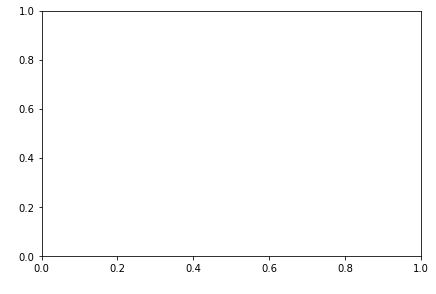

In [258]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.tight_layout()
plt.show()

In [262]:
import sklearn as sk
dir(sk.model_selection)

['BaseCrossValidator',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'fit_grid_point',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'validation_curve']